 # Introduction — Samsung Global Product Sales Dataset

The Samsung Global Product Sales Dataset contains structured sales data related to Samsung products. It is designed for analytical purposes, allowing users to examine sales performance and identify patterns within the data.

The dataset can be used to:

* Understand overall sales trends
* Analyze product performance
* Evaluate distribution of sales values
* Identify data quality issues

The goal of performing Exploratory Data Analysis on this dataset is to understand its structure and extract meaningful insights before deeper statistical or predictive analysis.


In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/kaggle/input/samsung-global-product-sales-dataset/samsung_global_sales_dataset.csv")


print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

Shape of dataset: (15500, 28)

First 5 rows:


,sale_id,sale_date,year,quarter,month,country,region,city,product_name,category,...,currency,fx_rate_to_usd,revenue_local_currency,sales_channel,payment_method,customer_segment,customer_age_group,previous_device_os,customer_rating,return_status
0,SAMS-00000001,2021-01-01,2021,Q1,January,Argentina,South America,Buenos Aires,Samsung Galaxy Tab S9 Ultra,Galaxy Tab,...,ARS,907.0,1130820.39,E-commerce Platform,Samsung Pay,Business,45–54,NaN,3.2,Kept
1,SAMS-00000002,2021-03-23,2021,Q1,March,Argentina,South America,Buenos Aires,Samsung Galaxy S23,Galaxy S,...,ARS,907.0,1322152.04,Authorized Reseller,Net Banking,Government,55+,Feature Phone,NaN,Kept
2,SAMS-00000003,2021-05-22,2021,Q2,May,Argentina,South America,Buenos Aires,Samsung Galaxy A34 5G,Galaxy A,...,ARS,907.0,1964398.74,Corporate / B2B,Gift Card,Individual,25–34,New User,3.5,Kept
3,SAMS-00000004,2021-07-26,2021,Q3,July,Argentina,South America,Buenos Aires,Samsung T55 27-inch FHD,Monitor,...,ARS,907.0,660359.49,Third-Party Retailer,BNPL (Buy Now Pay Later),Enterprise,55+,NaN,4.0,Kept
4,SAMS-00000005,2021-09-02,2021,Q3,September,Argentina,South America,Buenos Aires,Samsung Galaxy Z Fold 4,Galaxy Z,...,ARS,907.0,2835245.72,Authorized Reseller,Gift Card,Business,55+,Android (Other),3.0,Kept



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sale_id                 15500 non-null  object 
 1   sale_date               15500 non-null  object 
 2   year                    15500 non-null  int64  
 3   quarter                 15500 non-null  object 
 4   month                   15500 non-null  object 
 5   country                 15500 non-null  object 
 6   region                  15500 non-null  object 
 7   city                    15500 non-null  object 
 8   product_name            15500 non-null  object 
 9   category                15500 non-null  object 
 10  storage                 7651 non-null   object 
 11  color                   15500 non-null  object 
 12  is_5g                   15500 non-null  object 
 13  unit_price_usd          15500 non-null  float64
 14  discount_pct           

## Step 2 |    Data Type Fixing & Basic Cleaning

In [2]:
# Data Type Fixing & Missing Value Check

df['sale_date'] = pd.to_datetime(df['sale_date']) # Convert sale_date (Object type) to datetime
print("Updated Data Types:\n") # Confirm datatype conversion
print(df.dtypes)
missing_percent = (df.isnull().sum() / len(df)) * 100  # Calculate missing value percentage
print("\nMissing Value Percentage:\n")
print(missing_percent.sort_values(ascending=False))

Updated Data Types:

sale_id                           object
sale_date                 datetime64[ns]
year                               int64
quarter                           object
month                             object
country                           object
region                            object
city                              object
product_name                      object
category                          object
storage                           object
color                             object
is_5g                             object
unit_price_usd                   float64
discount_pct                       int64
units_sold                         int64
discounted_price_usd             float64
revenue_usd                      float64
currency                          object
fx_rate_to_usd                   float64
revenue_local_currency           float64
sales_channel                     object
payment_method                    object
customer_segment                  ob

## Step 3 | Descriptive Statistics & Numeric Analysis

In [3]:
 #Descriptive statistics for numeric columns
numeric_cols = ['unit_price_usd', 'discount_pct', 'units_sold', 'discounted_price_usd', 'revenue_usd'] 
# Summary stats
numeric_summary = df[numeric_cols].describe().T  # Transpose for readability
numeric_summary['total'] = df[numeric_cols].sum() # Add total revenue and total units sold
print("Descriptive Statistics & Totals:\n")
display(numeric_summary)

Descriptive Statistics & Totals:



,count,mean,std,min,25%,50%,75%,max,total
unit_price_usd,15500.0,665.116825,736.014360,8.20,185.435,421.49,938.6575,5442.7,10309310.79
discount_pct,15500.0,5.708452,6.406814,0.00,0.000,3.00,10.0000,20.0,88481.00
units_sold,15500.0,2.360000,1.897958,1.00,1.000,2.00,3.0000,10.0,36580.00
discounted_price_usd,15500.0,627.134001,695.723305,6.60,172.780,397.41,882.9075,5442.7,9720577.02
revenue_usd,15500.0,1478.145734,2368.688098,6.61,254.265,739.38,1695.3150,47665.9,22911258.88


## Step 4| Data Cleaning & Feature Preparation

In [4]:

# 4.1 Drop columns that are not useful for analysis
# These are IDs or columns we won’t use directly in EDA or modeling
cols_to_drop = ['sale_id', 'sale_date', 'currency', 'fx_rate_to_usd']
df_clean = df.drop(columns=cols_to_drop)

# 4.2 Handle missing values
# Fill categorical missing values with 'Unknown'
df_clean['storage'] = df_clean['storage'].fillna('Unknown')
df_clean['previous_device_os'] = df_clean['previous_device_os'].fillna('Unknown')

# Fill numeric missing values with median (robust for skewed distributions)
df_clean['customer_rating'] = df_clean['customer_rating'].fillna(df_clean['customer_rating'].median())

# 4.3 Convert storage to numeric
# Extract numbers from strings like '128GB', replace 'Unknown' with 0
df_clean['storage_numeric'] = df_clean['storage'].str.extract(r'(\d+)').fillna(0).astype(int)

# 4.4 Convert 'is_5g' column to boolean
# 'Yes' → True, 'No' → False
df_clean['is_5g'] = df_clean['is_5g'].map({'Yes': True, 'No': False})

# 4.5 Convert 'quarter' to integer
# 'Q1' → 1, 'Q2' → 2, etc.
df_clean['quarter'] = df_clean['quarter'].str.extract(r'Q(\d)').astype(int)

# 4.6 Encode 'month' as an ordered categorical
# This preserves the correct calendar order for analysis
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
df_clean['month'] = pd.Categorical(df_clean['month'], categories=month_order, ordered=True)

# 4.7 Check final dataset
print(" Data Types and Sample after Cleaning:")
display(df_clean.head())

print("\n Missing Values after Cleaning:")
print(df_clean.isnull().sum())

 Data Types and Sample after Cleaning:


,year,quarter,month,country,region,city,product_name,category,storage,color,...,revenue_usd,revenue_local_currency,sales_channel,payment_method,customer_segment,customer_age_group,previous_device_os,customer_rating,return_status,storage_numeric
0,2021,1,January,Argentina,South America,Buenos Aires,Samsung Galaxy Tab S9 Ultra,Galaxy Tab,1 TB,Graphite,...,1246.77,1130820.39,E-commerce Platform,Samsung Pay,Business,45–54,Unknown,3.2,Kept,1
1,2021,1,March,Argentina,South America,Buenos Aires,Samsung Galaxy S23,Galaxy S,1 TB,Titanium Violet,...,1457.72,1322152.04,Authorized Reseller,Net Banking,Government,55+,Feature Phone,3.7,Kept,1
2,2021,2,May,Argentina,South America,Buenos Aires,Samsung Galaxy A34 5G,Galaxy A,128 GB,Awesome Black,...,2165.82,1964398.74,Corporate / B2B,Gift Card,Individual,25–34,New User,3.5,Kept,128
3,2021,3,July,Argentina,South America,Buenos Aires,Samsung T55 27-inch FHD,Monitor,Unknown,Black,...,728.07,660359.49,Third-Party Retailer,BNPL (Buy Now Pay Later),Enterprise,55+,Unknown,4.0,Kept,0
4,2021,3,September,Argentina,South America,Buenos Aires,Samsung Galaxy Z Fold 4,Galaxy Z,256 GB,Cream,...,3125.96,2835245.72,Authorized Reseller,Gift Card,Business,55+,Android (Other),3.0,Kept,256



 Missing Values after Cleaning:
year                      0
quarter                   0
month                     0
country                   0
region                    0
city                      0
product_name              0
category                  0
storage                   0
color                     0
is_5g                     0
unit_price_usd            0
discount_pct              0
units_sold                0
discounted_price_usd      0
revenue_usd               0
revenue_local_currency    0
sales_channel             0
payment_method            0
customer_segment          0
customer_age_group        0
previous_device_os        0
customer_rating           0
return_status             0
storage_numeric           0
dtype: int64


## Step 5 | Target Variable & Skewness Handling

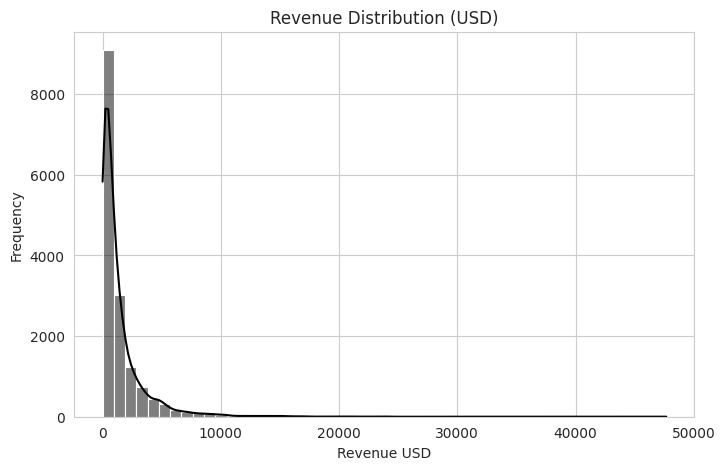

Skewness of revenue_usd: 5.62
Applied log1p transform to revenue_usd for normalization.


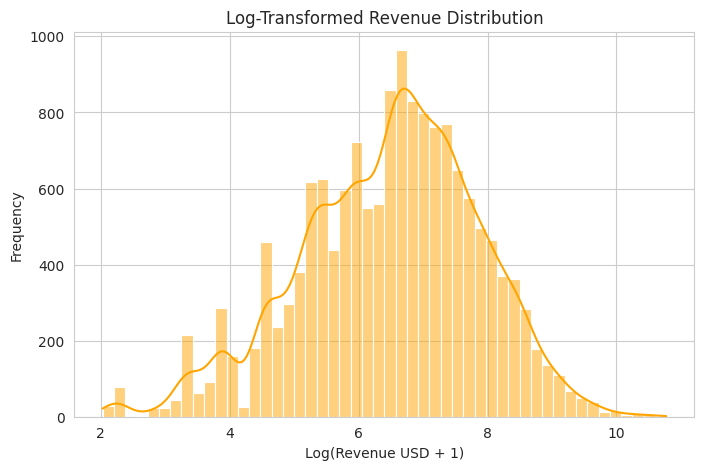

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# For better visuals
sns.set_style("whitegrid")

# 5.1 Define the target variable
target = 'revenue_usd'

# 5.2 Visualize revenue distribution
plt.figure(figsize=(8,5))
sns.histplot(df_clean[target], bins=50, kde=True, color='Black')
plt.title('Revenue Distribution (USD)')
plt.xlabel('Revenue USD')
plt.ylabel('Frequency')
plt.show()

# 5.3 Check the skewness of revenue
skew_value = df_clean[target].skew()
print(f"Skewness of {target}: {skew_value:.2f}")

# 5.4 Handle skewness (log-transform if highly skewed)
if abs(skew_value) > 1:
    df_clean['revenue_usd_log'] = np.log1p(df_clean[target])
    print(f"Applied log1p transform to {target} for normalization.")
    
    # Plot transformed revenue
    plt.figure(figsize=(8,5))
    sns.histplot(df_clean['revenue_usd_log'], bins=50, kde=True, color='orange')
    plt.title('Log-Transformed Revenue Distribution')
    plt.xlabel('Log(Revenue USD + 1)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Skewness is acceptable, no transform needed.")

## Step 6 | Data Visualization

## 6.1 Total Revenue by Product

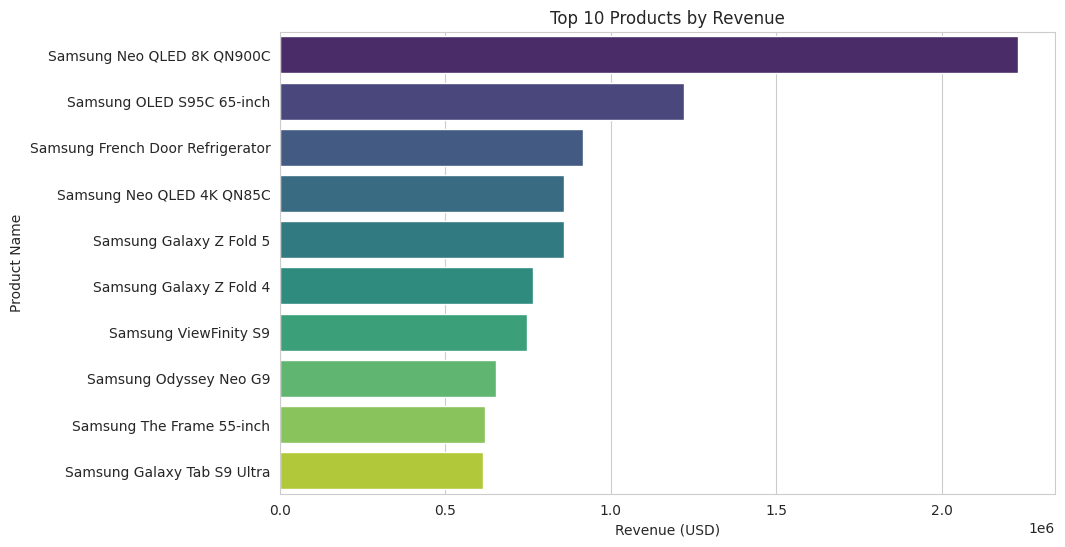

In [6]:
# Top 10 products by revenue
top_products = df.groupby('product_name')['revenue_usd'].sum().sort_values(ascending=False).head(10)
top_products_df = top_products.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_products_df,
    x='revenue_usd',
    y='product_name',
    hue='product_name',   # assign hue same as y
    dodge=False,
    palette='viridis',
    legend=False           # suppress legend
)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.show()

## 6.2: Total Revenue by Customer Segment

### Let’s visualize which segment brings in the most revenue

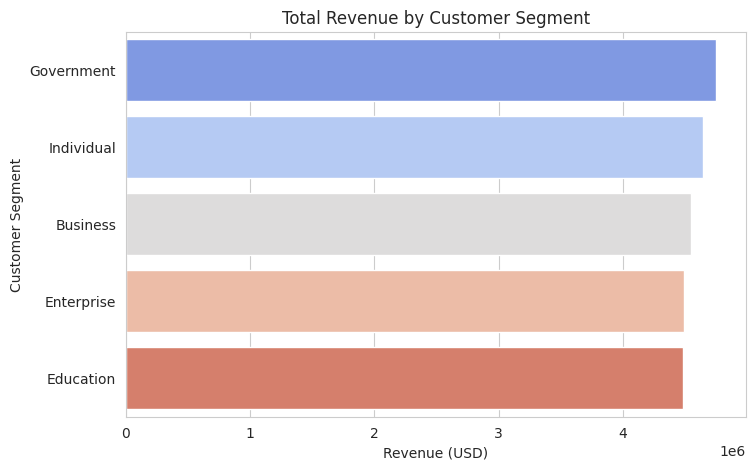

In [7]:
# 6.2 Total Revenue by Customer Segment
segment_revenue = df.groupby('customer_segment')['revenue_usd'].sum().sort_values(ascending=False)
segment_revenue_df = segment_revenue.reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=segment_revenue_df,
    x='revenue_usd',
    y='customer_segment',
    hue='customer_segment',
    dodge=False,
    palette='coolwarm',
    legend=False
)
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Revenue (USD)')
plt.ylabel('Customer Segment')
plt.show()

## 6.3: Revenue by Year and Quarter

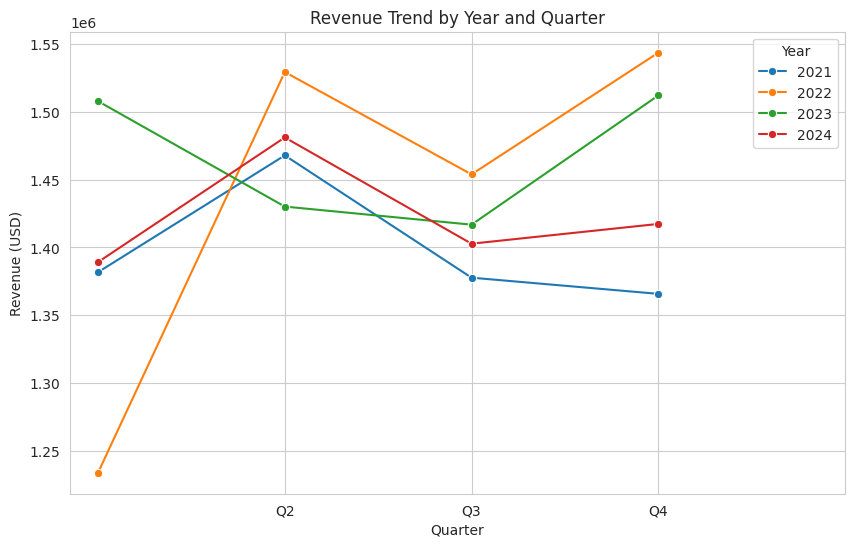

In [8]:
# 6.3 Revenue by Year and Quarter
revenue_time = df.groupby(['year', 'quarter'])['revenue_usd'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=revenue_time,
    x='quarter',
    y='revenue_usd',
    hue='year',
    marker='o',
    palette='tab10'
)
plt.title('Revenue Trend by Year and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue (USD)')
plt.xticks([1,2,3,4])
plt.legend(title='Year')
plt.show()

## 6.4: Revenue by Customer Age Group

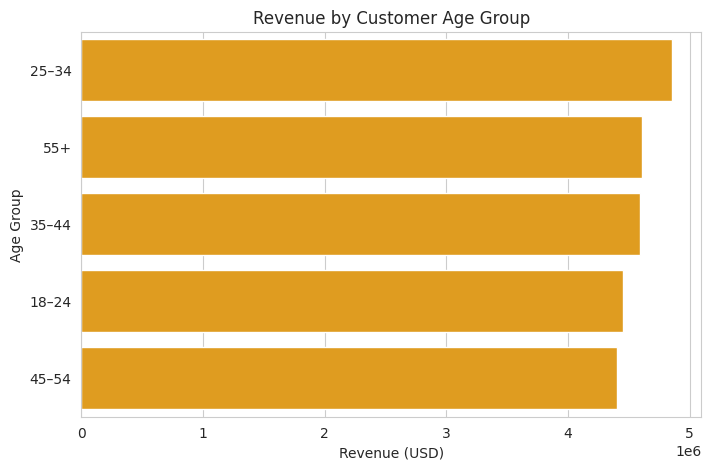

In [9]:
# 6.4 Revenue by Customer Age Group
age_revenue = df.groupby('customer_age_group')['revenue_usd'].sum().sort_values(ascending=False)

# Instead of palette directly, use Matplotlib or Seaborn without hue
plt.figure(figsize=(8,5))
sns.barplot(x=age_revenue.values, y=age_revenue.index, color='orange')  # use 'color' instead of 'palette'
plt.title('Revenue by Customer Age Group')
plt.xlabel('Revenue (USD)')
plt.ylabel('Age Group')
plt.show()

## 6.5 Revenue by Product & Customer Segment

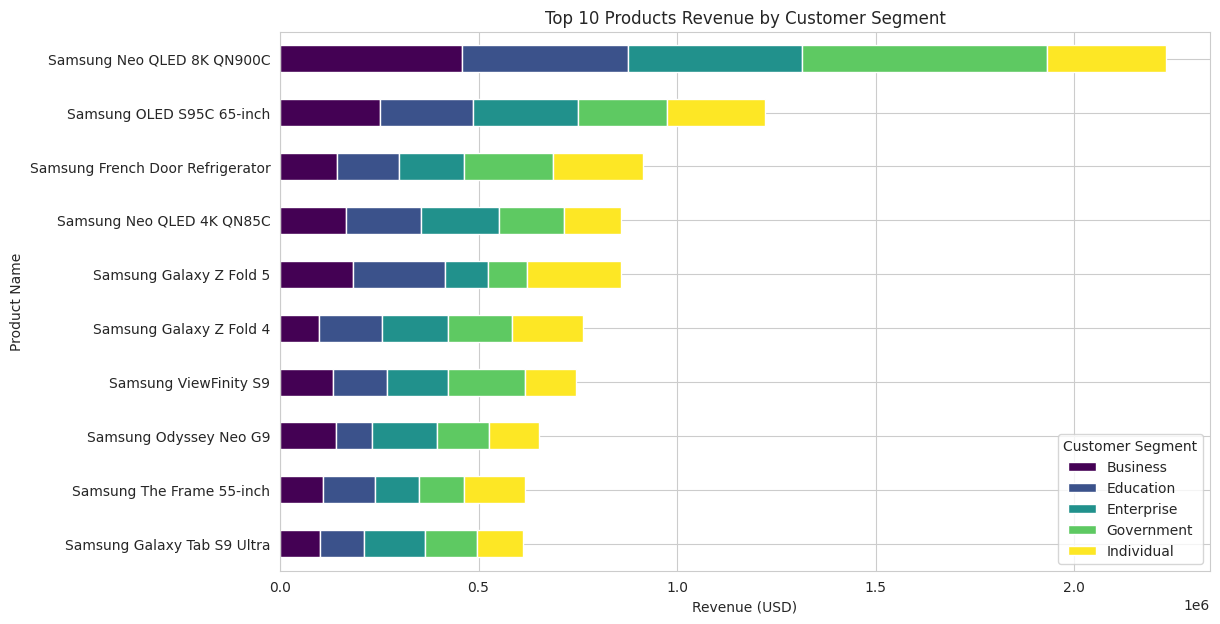

In [10]:

product_segment_revenue = df.groupby(['product_name', 'customer_segment'])['revenue_usd'].sum().unstack().fillna(0)

# Sort by total revenue
top_products = product_segment_revenue.sum(axis=1).sort_values(ascending=False).head(10)
top_product_segment_revenue = product_segment_revenue.loc[top_products.index]

# Plot
top_product_segment_revenue.plot(kind='barh', stacked=True, figsize=(12,7), colormap='viridis')
plt.title('Top 10 Products Revenue by Customer Segment')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.legend(title='Customer Segment')
plt.gca().invert_yaxis()  # highest revenue on top
plt.show()

## 6.5 High-Impact Insight: Revenue by Customer Segment, Age Group & 5G Device

### Why this is impactful:

* Combines 3 dimensions: segment, age, device type.

* Shows exactly where the money comes from — you can target ads, promotions, or new launches efficiently.

* Highlights 5G device customers, which might be the fast-growing high-revenue segment.

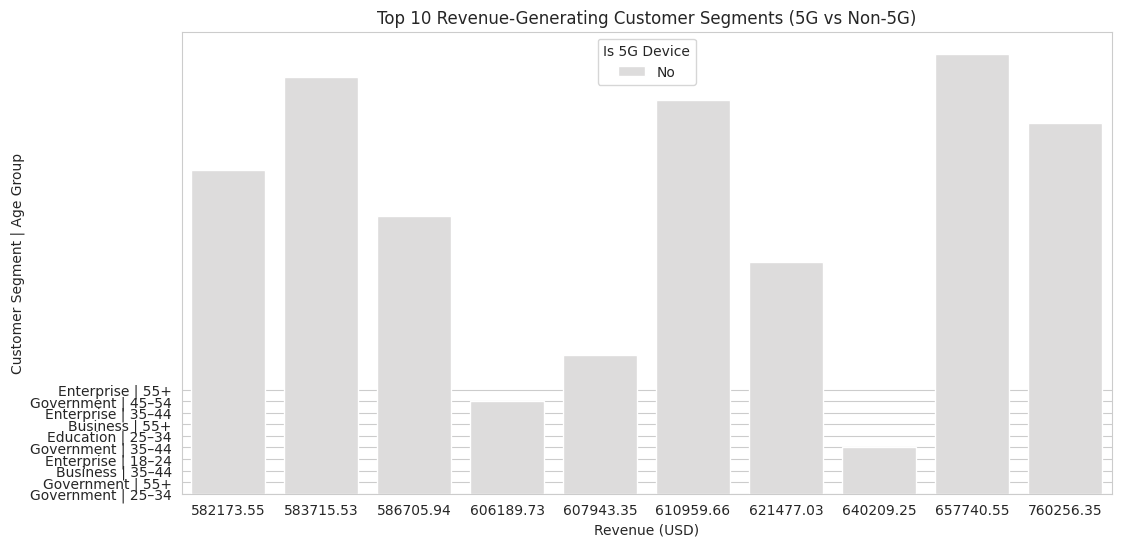

In [11]:
# 6.5 High-Impact Insight: Revenue by Customer Segment, Age Group & 5G Device
revenue_segment = df.groupby(
    ['customer_segment', 'customer_age_group', 'is_5g']
)['revenue_usd'].sum().reset_index()

# Sort top 10 combinations
top_segment_revenue = revenue_segment.sort_values(by='revenue_usd', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x='revenue_usd', 
    y=top_segment_revenue.index, 
    hue='is_5g', 
    data=top_segment_revenue, 
    dodge=False,  # bars next to each other instead of stacked
    palette='coolwarm'
)
plt.yticks(ticks=range(len(top_segment_revenue)), labels=top_segment_revenue['customer_segment'] + " | " + top_segment_revenue['customer_age_group'])
plt.title('Top 10 Revenue-Generating Customer Segments (5G vs Non-5G)')
plt.xlabel('Revenue (USD)')
plt.ylabel('Customer Segment | Age Group')
plt.legend(title='Is 5G Device')
plt.show()

## 7 Advanced Insight: Revenue Heatmap by Segment, Age, and 5G Device

Why this is more powerful:

Combines all dimensions in a single view.

High-revenue “hotspots” immediately stand out — you can literally see which segment + age + device drives revenue.

Businesses can use this to:

Target marketing campaigns efficiently.

Prioritize inventory for products favored by high-revenue segments.

Decide which customer groups to push new 5G devices or accessories to.

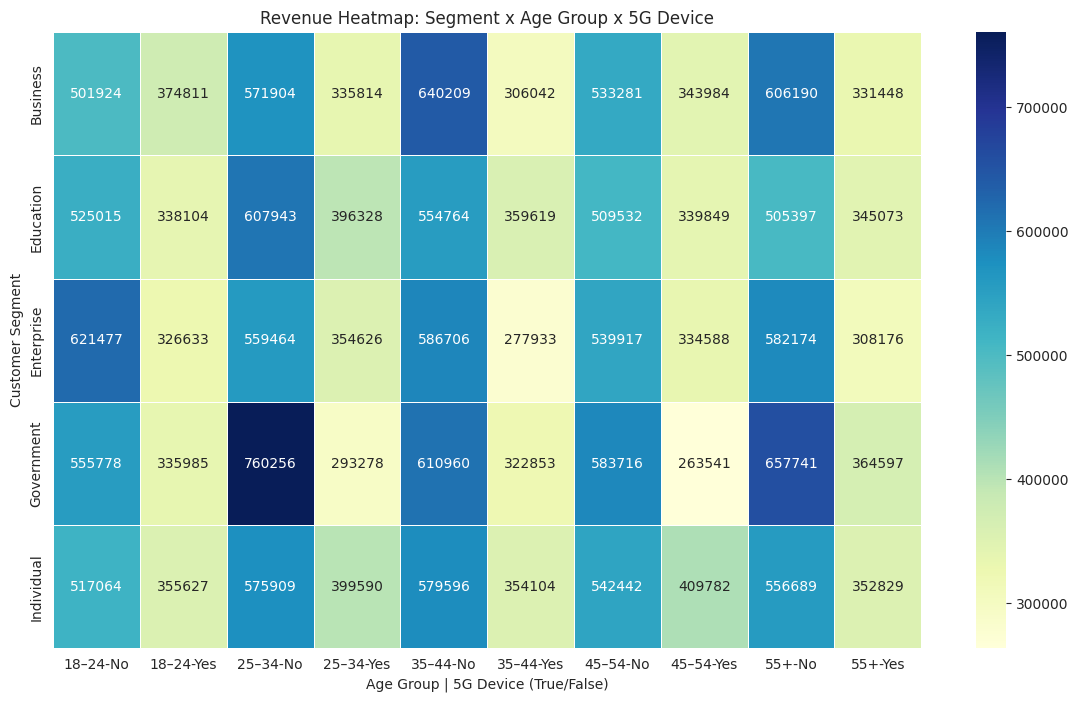

In [12]:
# 6.6 Advanced Insight: Revenue Heatmap by Segment, Age, and 5G Device
pivot_revenue = df.pivot_table(
    index='customer_segment', 
    columns=['customer_age_group', 'is_5g'], 
    values='revenue_usd', 
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot_revenue, 
    annot=True, 
    fmt=".0f", 
    cmap='YlGnBu', 
    linewidths=0.5
)
plt.title('Revenue Heatmap: Segment x Age Group x 5G Device')
plt.xlabel('Age Group | 5G Device (True/False)')
plt.ylabel('Customer Segment')
plt.show()